The dataset for this project is the Breast cancer wisconsin (diagnostic) dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
It has 30 float columns each of them descirbes a certain measurement about the cell. And one int column(target)that categorise these cells weather they are malignant or benign
Main objective of the analysis is to see if we can cluster the cells in  2 types (0,1)malignant or benign and compare them with the original  results of the data set to see how much the clustering models were accurate. . best candidate model with the best results will be chosen.

# Data exploration and preprocessing


Here we want to check
1)our features are on the same scale and normal distributed and weather or not they need to be tranformed
2)the correlation between our values and how much they are related to each other
3)make sure that our data set is well prepared so we can fit them in our clustering models

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)

In [23]:
df_X1=pd.DataFrame(data.data,columns=data.feature_names)
df_y1=pd.DataFrame(data.target)

In [24]:
cancer_data = pd.concat([df_X1, df_y1], axis=1)


In [25]:
cancer_data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

we can see that we have 569 of total samples 

Now lets check the correlation between our features

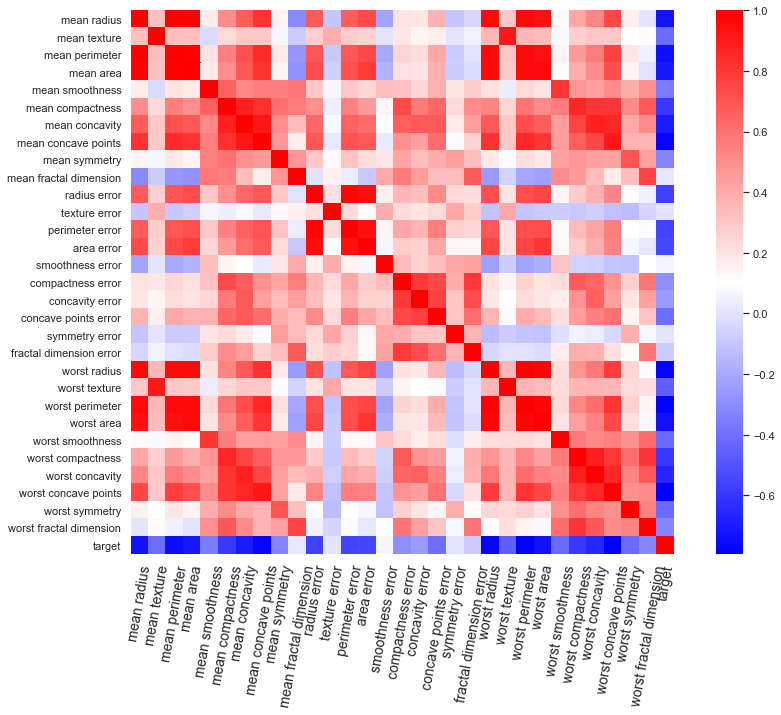

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations=cancer_data.corr()
sns.heatmap(data=correlations ,square=True,cmap='bwr')
sns.set(rc = {'figure.figsize':(15,10)})
plt.xticks(rotation=80,fontsize=14);
plt.yticks(rotation=0);

we can see that we have a lot of different correlations weahter they are +ve or -ve correlations up there in our heat map. the target column is -ve correlated with most of the features. Its hard to tell all of our correlations using the heatmap as we have a lot of features.



Now lets check the value counts of each of our data set categories

In [30]:
cancer_data.target.value_counts()

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:>

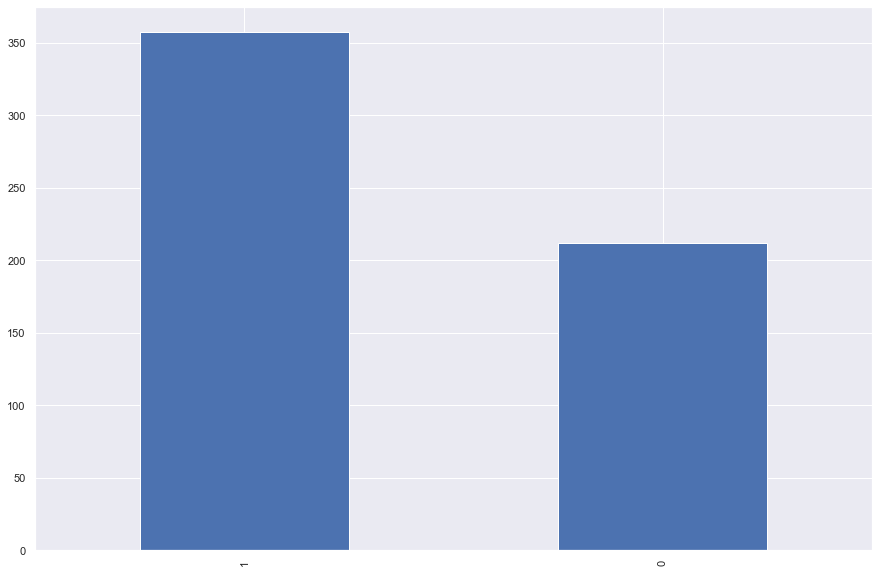

In [29]:
cancer_data.target.value_counts().plot(kind='bar')

we can see that we have more than 350 but less than 360 being categrized as 1 and more than 200 but less than 220 sample being categrized as 0

Now lets check the distribution of our feature and wether or not they are skewed

In [48]:
feature_cols = cancer_data.columns[:-1]
skew_columns = (cancer_data[feature_cols]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area error                 5.447186
concavity error            5.110463
fractal dimension error    3.923969
perimeter error            3.443615
radius error               3.088612
smoothness error           2.314450
symmetry error             2.195133
compactness error          1.902221
worst area                 1.859373
worst fractal dimension    1.662579
texture error              1.646444
mean area                  1.645732
worst compactness          1.473555
concave points error       1.444678
worst symmetry             1.433928
mean concavity             1.401180
mean fractal dimension     1.304489
mean compactness           1.190123
mean concave points        1.171180
worst concavity            1.150237
worst perimeter            1.128164
worst radius               1.103115
mean perimeter             0.990650
mean radius                0.942380
dtype: float64

we can see that we have 24 of our features are too skewed lets plot them to make it clear to use to visualise it and then lets tranform their values

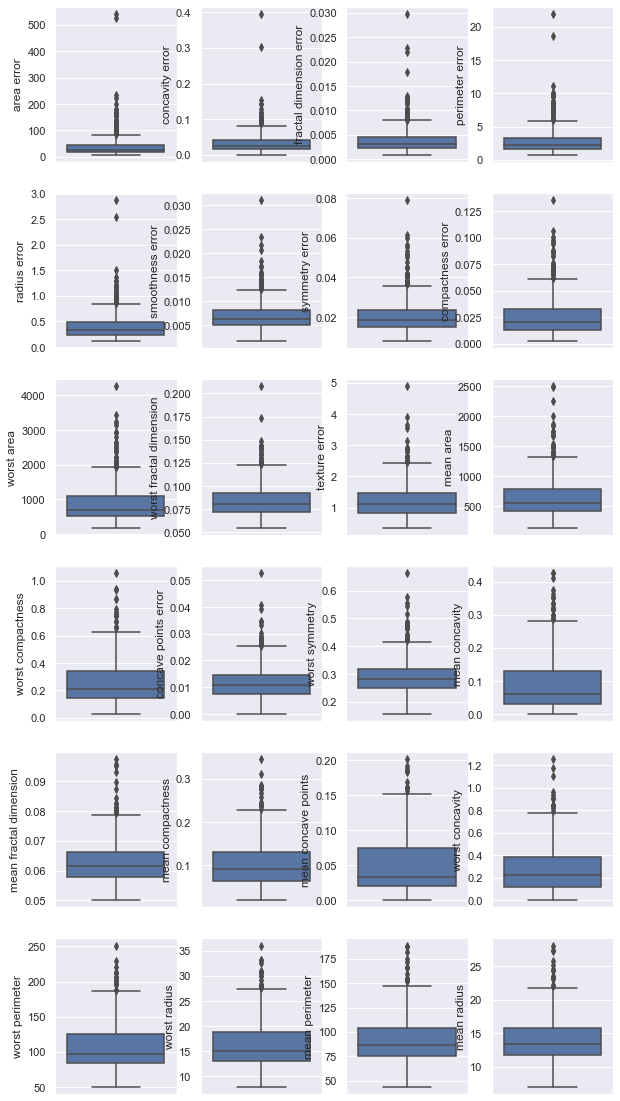

In [47]:
fig, axes = plt.subplots(6,4,figsize= [10,20])

y=0
x=0
import seaborn as sns
for col in skew_columns.index.tolist():
        sns.boxplot(data=cancer_data,y=col,ax=axes[x,y])
        y=y+1

        if y>3:
            x=x+1
            y=0
        if x>5:
            break

as we can see above area error and concavity error are the top skewed features             


now lets use the log transform to manage these features

In [10]:
for col in skew_columns.index.tolist():
    cancer_data[col] = np.log1p(cancer_data[col])

Now since our data is not on the same scale we so we need to normalize them as much as possible so tha diversity in scaling do not badly affect our clustering algorithms

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cancer_data[float_columns] = sc.fit_transform(cancer_data[feature_cols])

cancer_data.head(4)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                2.255747  ...      -1.359293         2.303601    2.001237   
1               -0.868652  ...      -0.369203         1.535126    1.890489   
2               -0.398008  ...      -0.023974         1.347475    1.456285   
3                4.910919  ...       0.133984        -0.249939   -0.550021   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   

   worst symmetry  worst fractal dimension  target  
0        2.750622                 1.937015       0  
1       -0.243890                 0.281190       0  
2        1.152255                 0.201391       0  
3        6.046041                 4.935010       0  

[4 rows x 31 columns]

with our data being ready we can now try our clustring algorithms and see what results we are going to get

# K-means

since we are previously aware that we only have two categroies on our cancer data set (malignant or benign) we  will intialize our K-means model with setting the number of clusters to 2  

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(cancer_data[feature_cols])

cancer_data['kmeans'] = km.predict(cancer_data[feature_cols])

In [57]:
(cancer_data[['target','kmeans']]
 .groupby(['kmeans','target'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans target        
0      0          175
       1           14
1      0           37
       1          343

Alright it seems that Knn did a pretty good job at clustring our data with only  14 samples being categorized as 1 instead of 0 and 37 as 0 insted of 1. which is really an amazing job

Now lets check our elbow point based on our inertie and cluster graph and see if really 2 is the suitable number of clusters here in our dataset

In [15]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(cancer_data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


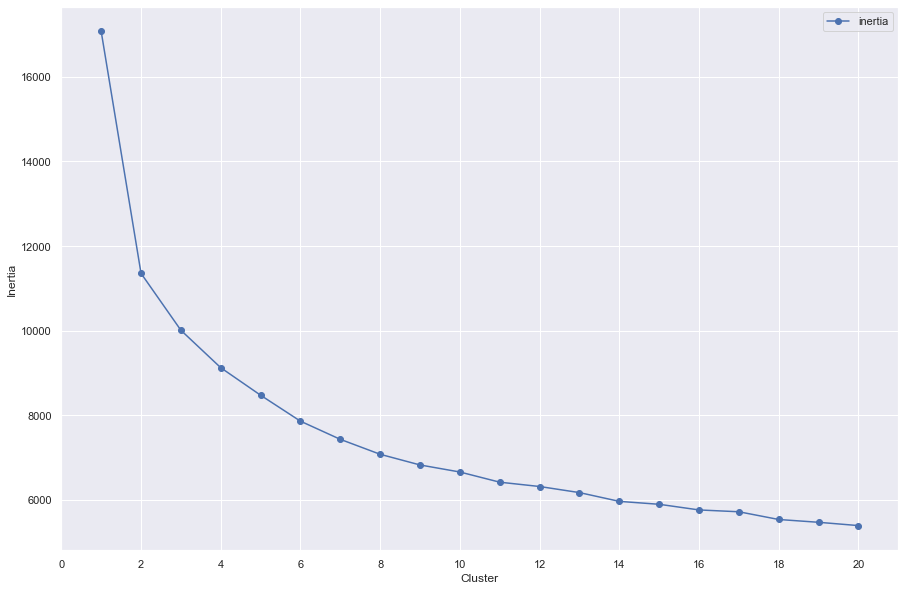

In [16]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

our graph intertia starts  to be decrease  starting from 2 till 20 and we can say it starts to do that good job at 2 

# Hierarchical clustering

we wil first with our default paramters as the linkage type here will be ward bu default and then we can later try diffrent linkage types to see if we can get better results. And ofcourse we will set the number of clusters to 2 since we have 2 categries

In [58]:

from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2)
ag = ag.fit(cancer_data[feature_cols])
cancer_data['agglom'] = ag.fit_predict(cancer_data[feature_cols])

In [59]:
(cancer_data[['target','agglom']]
 .groupby(['agglom','target'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))


number
agglom target        
0      0          164
       1           20
1      0           48
       1          337

seeing the results above we can see that  Hierarchical clustering using ward linkage did also a pretty decent job.
compared to the k-means. K-means was better in categorizing both the 0 and 1 cells

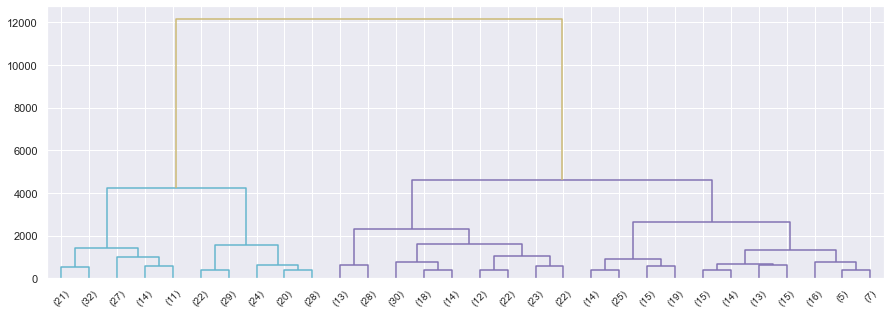

In [71]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

hierarchy.set_link_color_palette(['c', 'm'])



den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='y')

and here we can visualize our hierarchial clustring

# Hierarchical clustering (using average linkage)

In [60]:
agAVG = AgglomerativeClustering(n_clusters=2, linkage='average', compute_full_tree=True)
agAVG = ag.fit(cancer_data[feature_cols])
cancer_data['agglomAVG'] = agAVG.fit_predict(cancer_data[feature_cols])

In [61]:
(cancer_data[['target','agglomAVG']]
 .groupby(['agglomAVG','target'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglomAVG target        
0         0          164
          1           20
1         0           48
          1          337

results are identical with the ward linkage parameter hence k-means is still the best model to use

# Next steps


Despite the fact that our 3 models did a very decent job clustring our 2 cell categories,we can use different hyperparamters in the hirerachial clustering and try different linkage types other than the 2 we tried above to see if we can acheive better results. 